# Experiments and tests

In [1]:
import GeneticPGCSOptimizer as go
from communication_grid import Grid
import matplotlib.pyplot as plt
from utils import *

source_f = "training_corpora/animals_corpus.txt"
eval_f = "evaluation_corpora/animals_eval.txt"

if __name__ == '__main__':
    optimizer = go.GeneticPGCSOptimizer(source_f,eval_f,pop_size = 200, select_number = 30,
                                           gen_number = 200, randomizer = True, distance_formula = "euclidean",
                                           cost_average = False,nb_proc = 4)

    optimal_grid,cost = optimizer.genetic_pgcs_optimization()

    print("\n BEST COST : ",cost)

####### Genetic Pictogram Grid Communication Optimizer #######

## Optimizer Parameters ##
------------------------------------------------------------------------
Source file : training_corpora/animals_corpus.txt     Evaluation file : evaluation_corpora/animals_eval.txt
------------------------------------------------------------------------
  INITIAL POPULATION SIZE : 200

  NUMBER OF GENERATION : 200

  CROSSOVER RATE : 50.0%     MUTATION RATE : 50.0%

  CROSSOVER INFORMATION RATE : 50.0%

  DISTANCE FORMULA (COST) : EUCLIDEAN
------------------------------------------------------------------------
  NUMBER OF PROCESSES : 4
------------------------------------------------------------------------


 BEST COST :  438.6762736323671


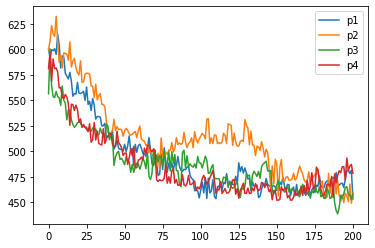

In [2]:
#Display the grid in one image (stored as "default.png")
optimal_grid.display()

#Plot the history
histos = optimizer.fitness_history(option="gen_best")

i = 1
for hist in histos:
    plt.plot(hist,label = "p"+str(i))
    i = i + 1

plt.legend()
plt.show()